In [1085]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn import preprocessing

In [1119]:
df=pd.read_csv("house_reg2.csv",index_col=0)

In [1120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1093 non-null   float64
 1   isitma             1093 non-null   object 
 2   celly_buildingAge  1093 non-null   int64  
 3   celly_floortype    1093 non-null   object 
 4   location           1093 non-null   object 
 5   price              1093 non-null   int64  
 6   ad_duration        1093 non-null   int64  
 7   metroya_yakın      1093 non-null   int64  
 8   teras              1093 non-null   int64  
 9   eşyalı             1093 non-null   int64  
 10  bahçeli            1093 non-null   int64  
 11  bedroom            1093 non-null   int64  
 12  salon              1093 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 119.5+ KB


In [1121]:
num=["m2","ad_duration","celly_buildingAge","bedroom","price","salon"]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2520x2160 with 0 Axes>

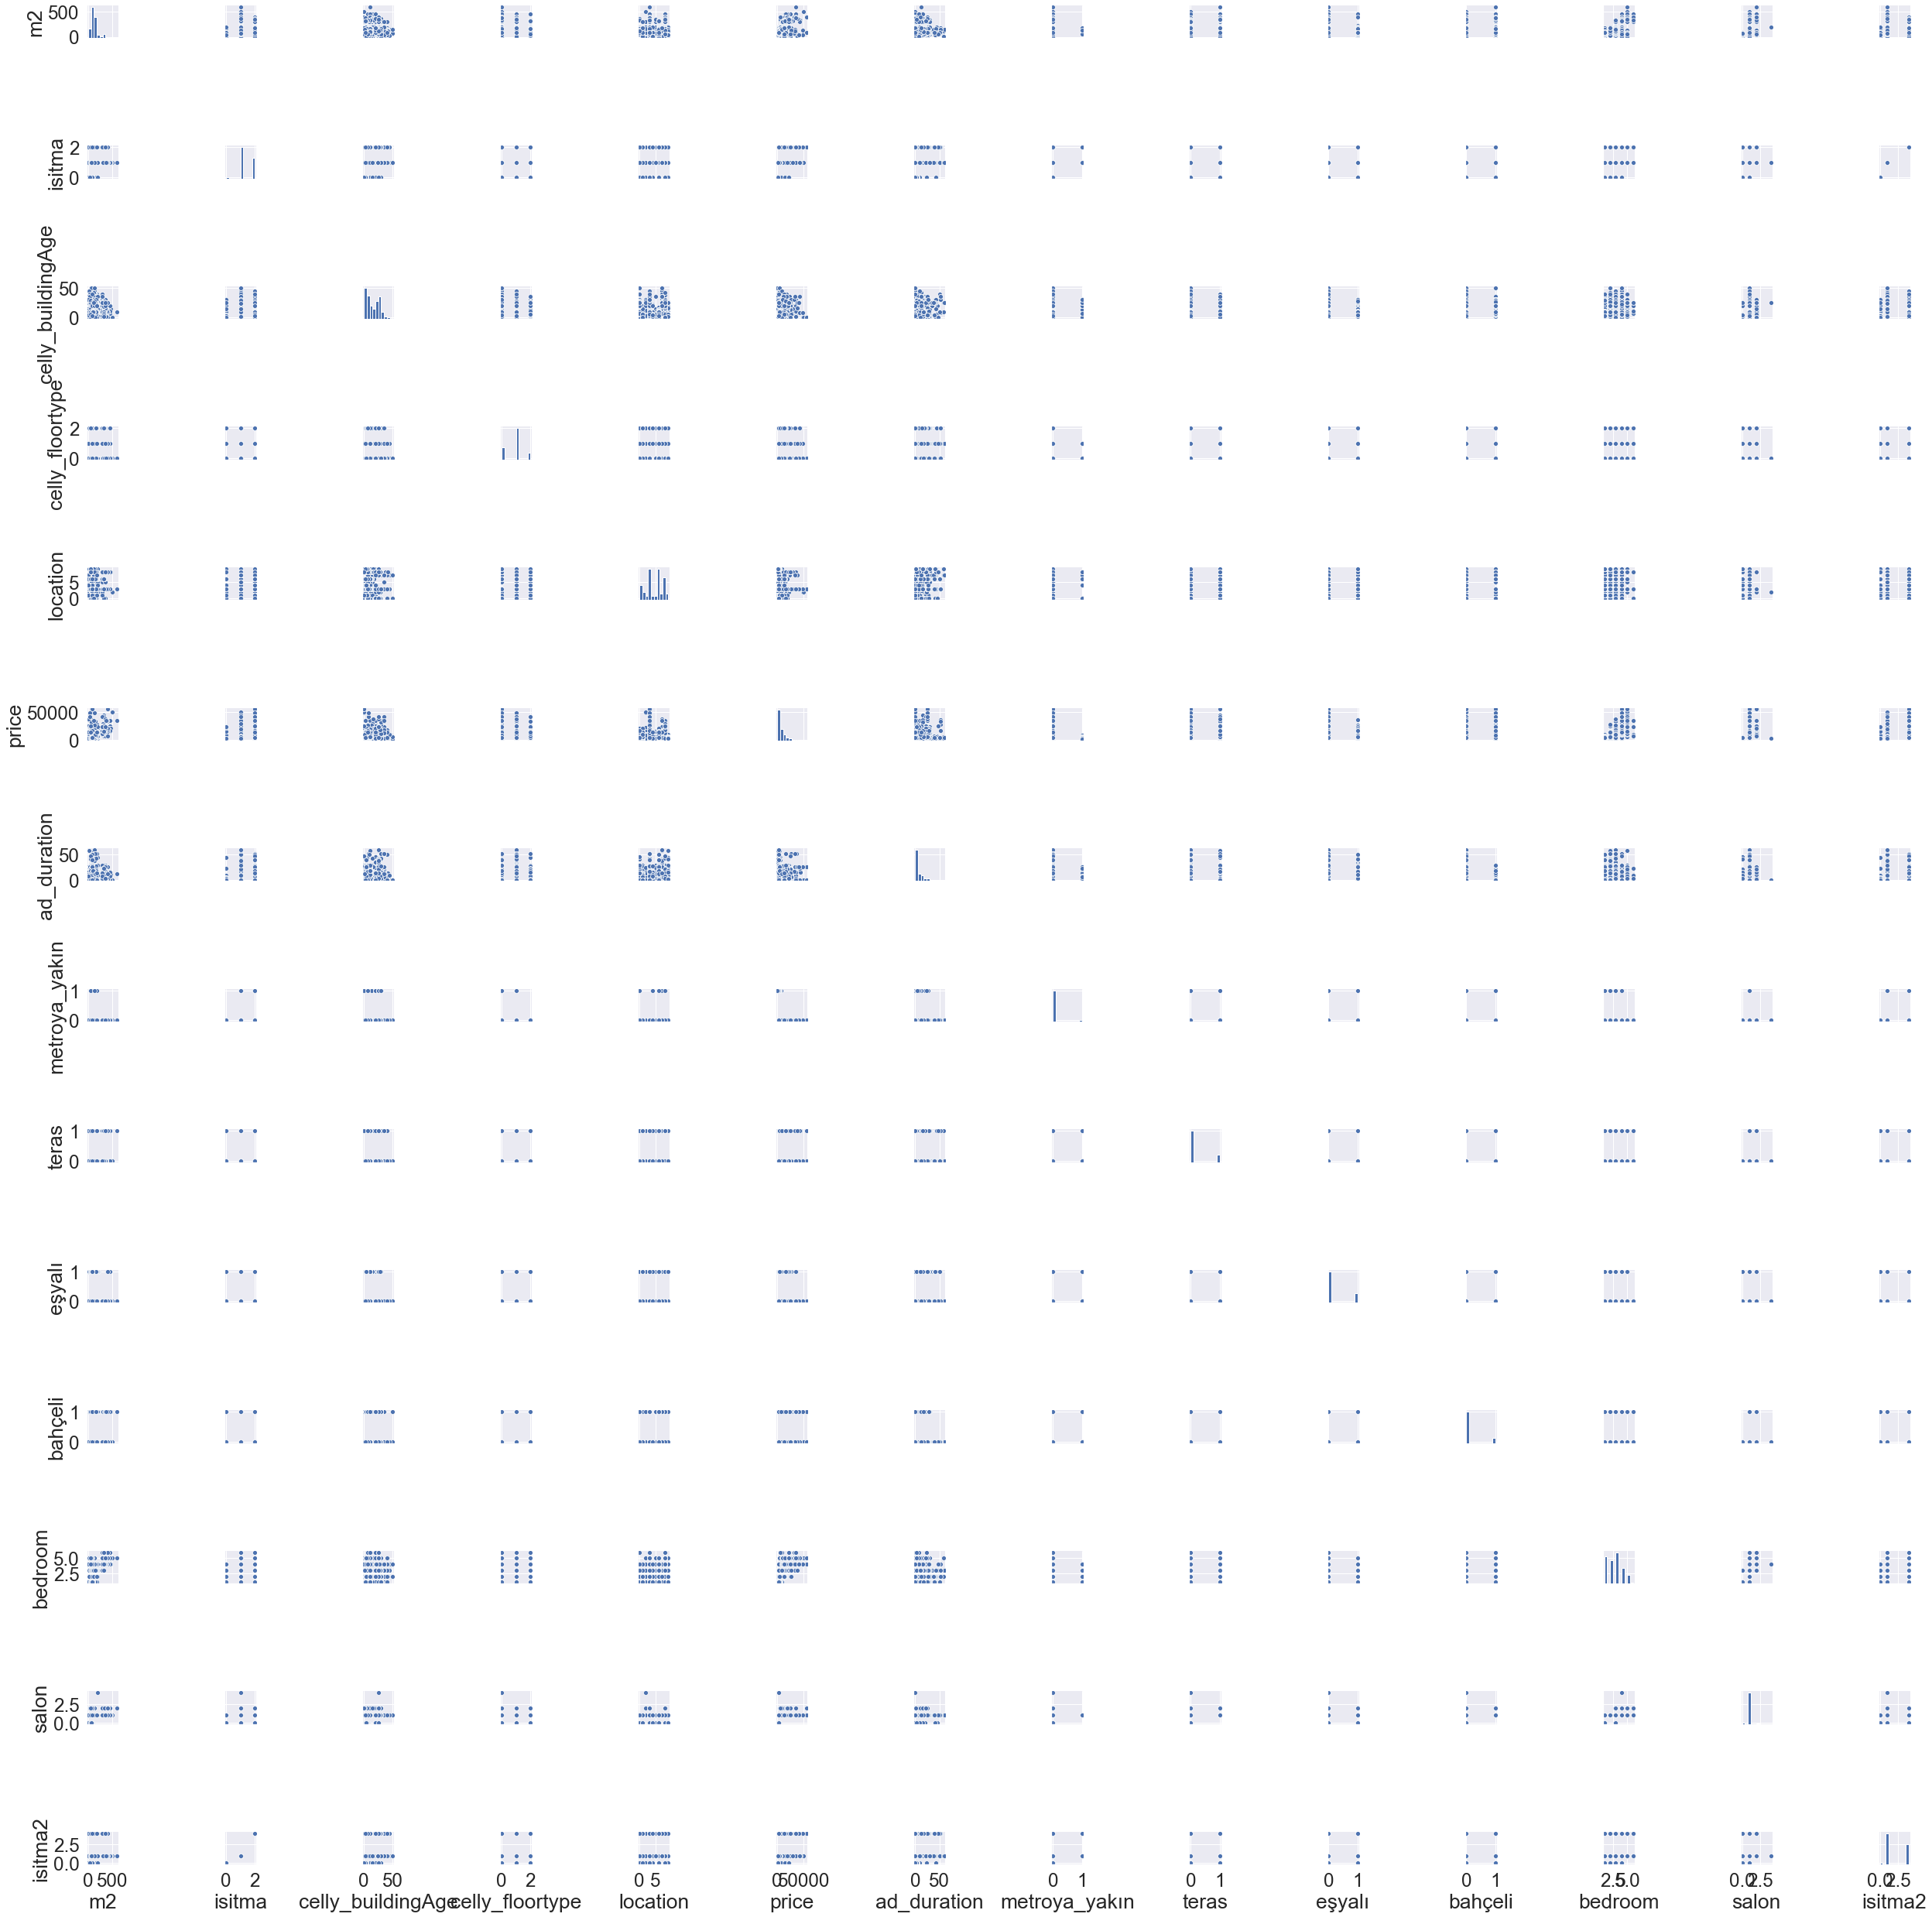

In [1078]:
plt.figure(figsize=(35,30))
sns.pairplot(df)
plt.tight_layout()
plt.savefig("pair.jpeg",dpi=300,bbox_inches="tight")

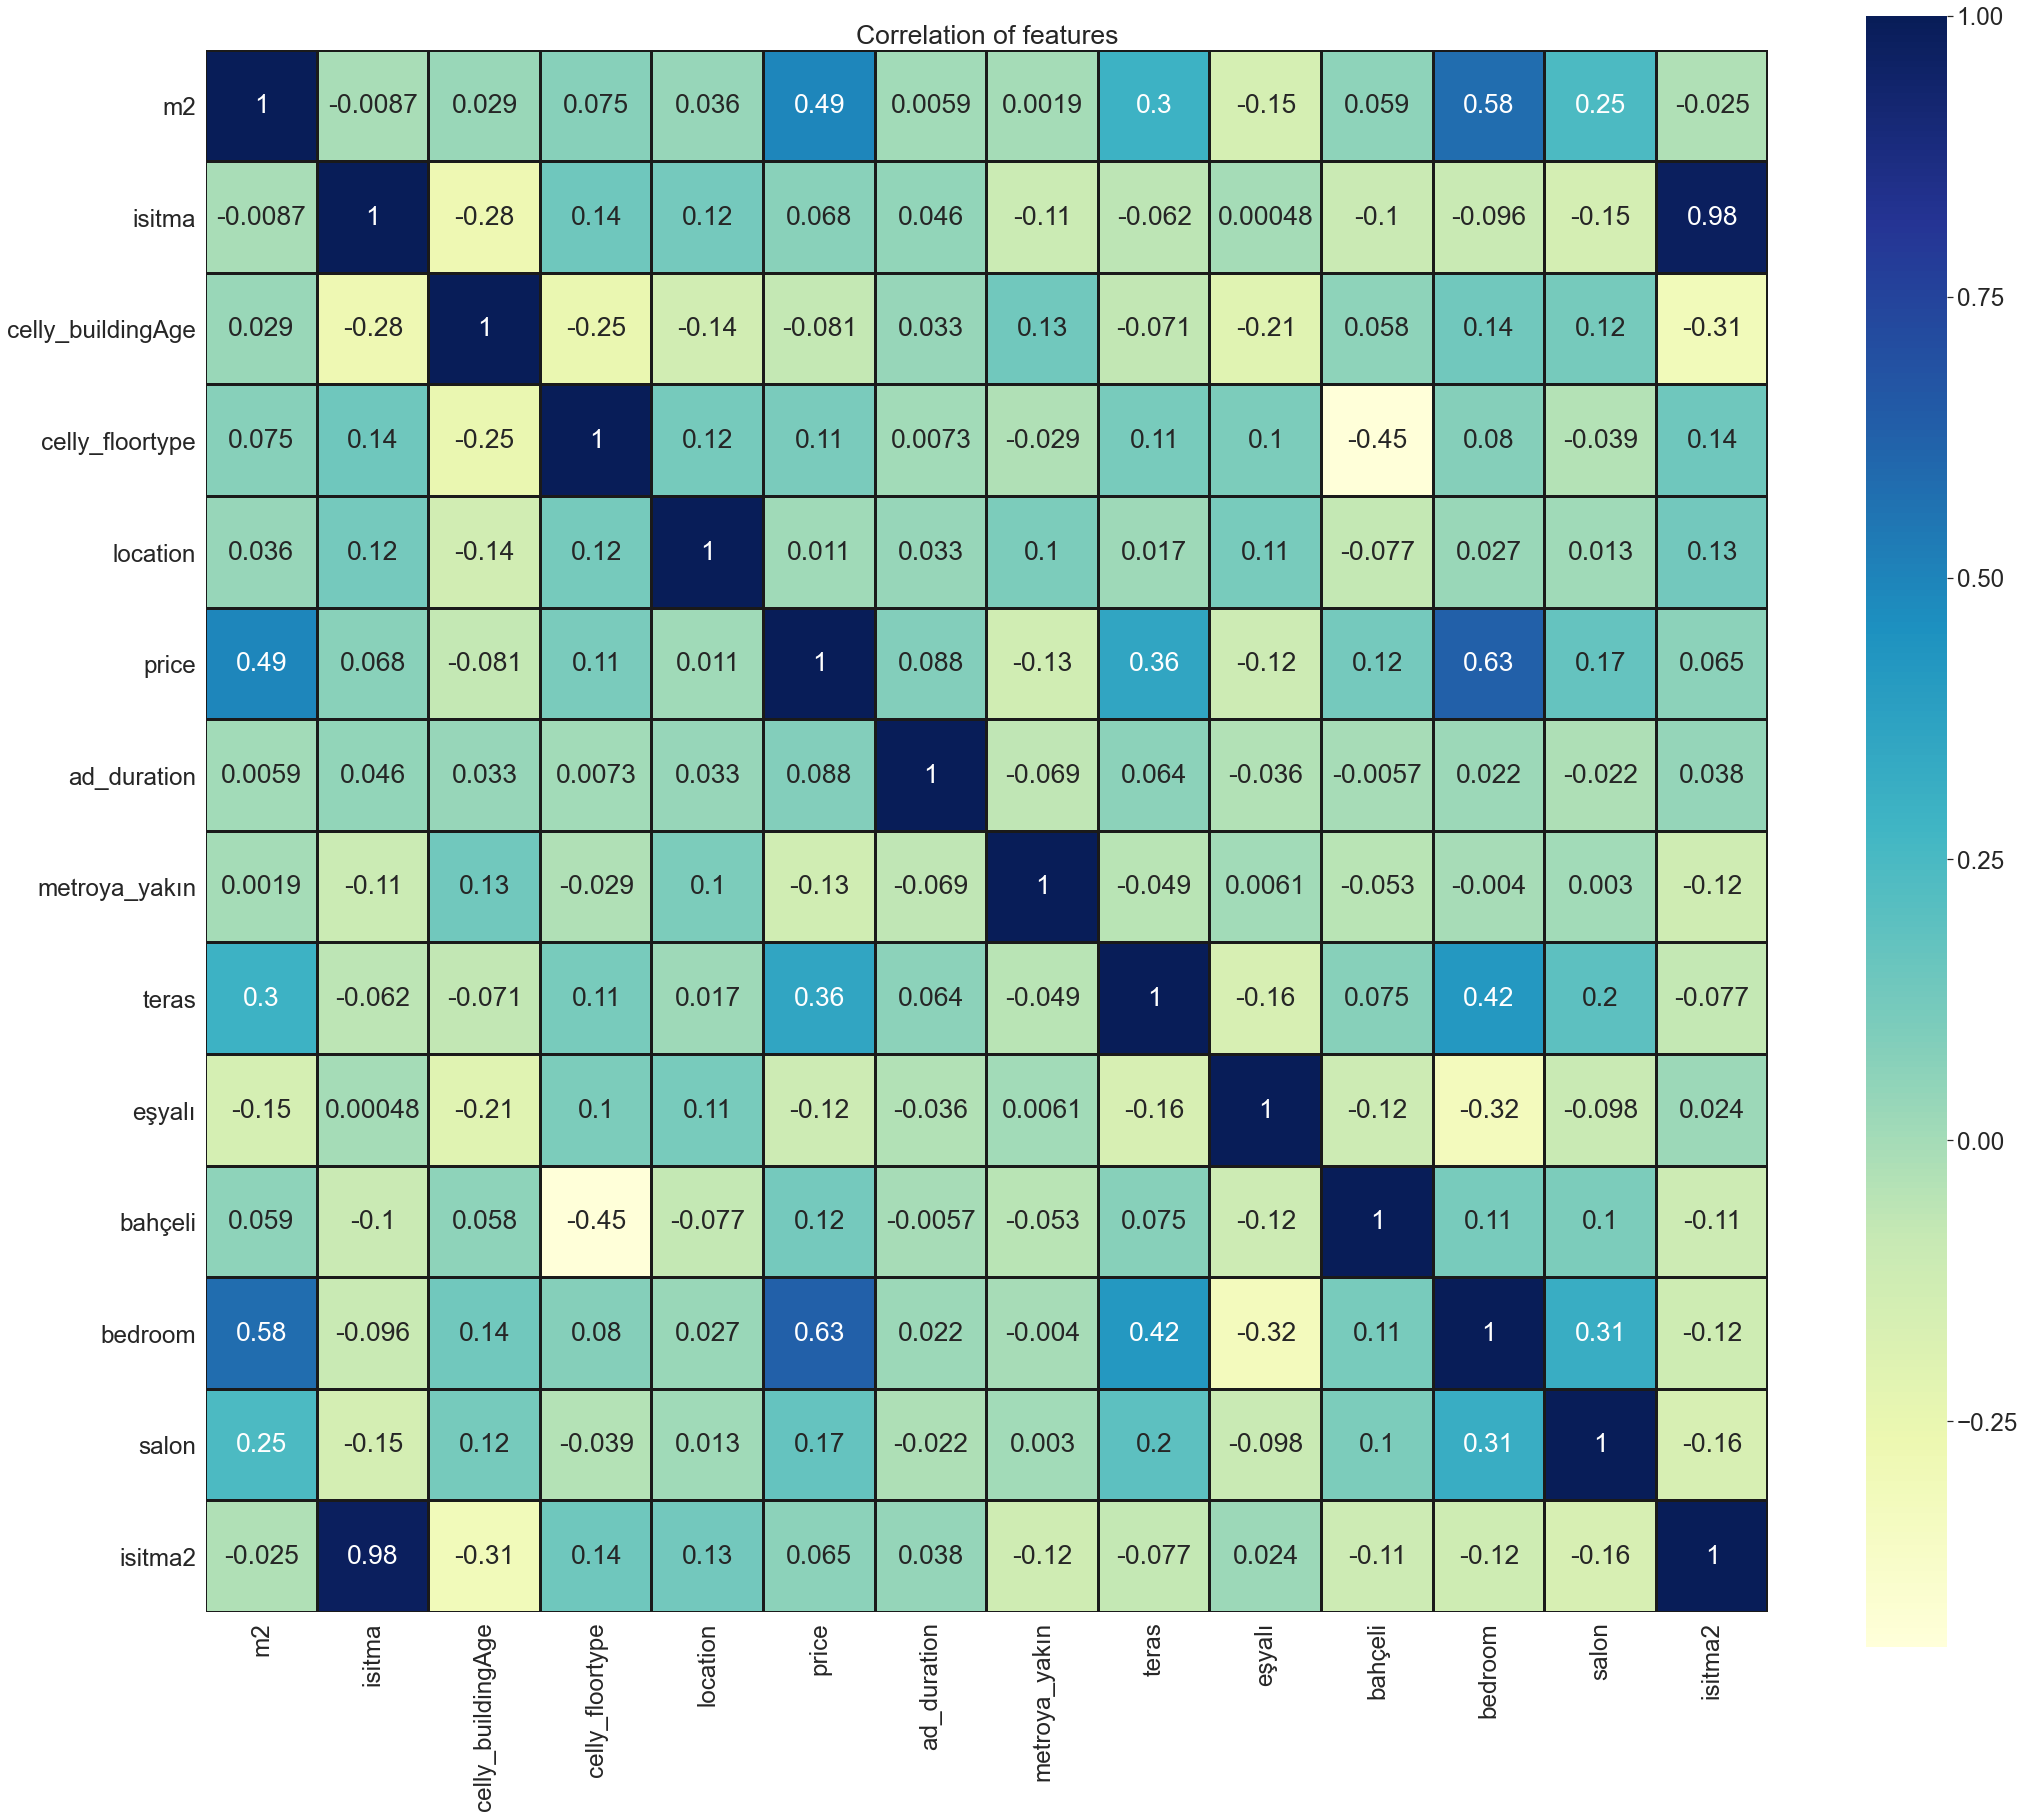

In [1077]:
sns.set(font_scale=2.2)
fig,ax=plt.subplots(figsize=(35,30))
plt.title("Correlation of features")
sns.heatmap(df.corr(),linewidths=2.0,vmax=1.0,square=True,cmap="YlGnBu",linecolor="k",annot=True);
plt.savefig("corr.jpeg",dpi=300,bbox_inches="tight")

In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1052 non-null   float64
 1   isitma             1052 non-null   object 
 2   celly_buildingAge  1052 non-null   int64  
 3   celly_floortype    1052 non-null   object 
 4   location           1052 non-null   object 
 5   price              1052 non-null   int64  
 6   ad_duration        1052 non-null   int64  
 7   metroya_yakın      1052 non-null   int64  
 8   teras              1052 non-null   int64  
 9   eşyalı             1052 non-null   int64  
 10  bahçeli            1052 non-null   int64  
 11  bedroom            1052 non-null   int64  
 12  salon              1052 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 115.1+ KB


In [1122]:
df=df.drop_duplicates() 

In [961]:
num_df=df[list(df.select_dtypes(exclude=["object"]).columns)]

In [923]:
num_df.columns

Index(['m2', 'celly_buildingAge', 'price', 'ad_duration', 'metroya_yakın',
       'teras', 'eşyalı', 'bahçeli', 'bedroom', 'salon'],
      dtype='object')

In [921]:
df.groupby("celly_buildingAge").price.mean().sort_values(ascending=False).head()

celly_buildingAge
13    18398.333333
35    15180.555556
38    15000.000000
12    14267.692308
9     13508.333333
Name: price, dtype: float64

This is our first result.Before feature engineering we have <code>m2</code>,<code>bedroom</code>, <code>salon</code>,<code>celly_buildingAge</code>,<code>ad_duration</code>,<code>salon</code> columns.Let's put these features OLS Model.

In [1124]:
y,X=np.log(df["price"]),sm.add_constant(df[["m2","bedroom","salon","celly_buildingAge","ad_duration"]])
lm_ols_2=sm.OLS(y,X,data=df)
fit_ols_2=lm_ols_2.fit()
fit_ols_2.summary() # burda const=0 veriyor sm.ad_constan( yapazken ki biaslı bi model oluyor bu.)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          9.24e-170
Time:                        22:18:00   Log-Likelihood:                -912.20
No. Observations:                1052   AIC:                             1836.
Df Residuals:                    1046   BIC:                             1866.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6672      0.076    101.467      0.000       7.519       7.815
m2                    0.0015      0.000      5.435      0.000       0.001       0.002
bedroom               0.4098      0.018     22.975      0.000       0.375       0.445
salon                 0.0253      0.073      0.345      0.730      -0.119       0.169
celly_buildingAge    -0.0209      0.002    -12.034      0.000      -0.024      -0.017
ad_duration           0.0042      0.002      2.273      0.023       0.001       0.008
==============================================================================
Omnibus:                       22.169   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.516
Skew:                           0.327   Prob(JB):                     7.83e-06
Kurtosis:                       3.328   Cond. No.                         867.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresyon Modelleri

In [1097]:
def split_and_validate(X, y):
    
    # perform train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#LR    
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    
    # score fit model on validation data
    val_score_lm = lr_model.score(X_val, y_val)
    
# Poly    
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly,y_train)
    
    val_score_poly=lm_poly.score(X_val_poly,y_val)
    

# Ridge    
    ridge_model=Ridge(alpha=0.005,normalize=True)
    ridge_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score_ridge = ridge_model.score(X_val, y_val)    
    
# Lasso    
    lasso_model=Lasso(alpha=0.005,normalize=True)
    lasso_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score_lasso = lasso_model.score(X_val, y_val)    
    
#CV

    kf = KFold(n_splits=10, shuffle=True, random_state = 42)

    
    # report results
    #print('\nValidation R^2 score of linear regression was:', val_score_lm)
    print('\nValidation R^2 score of linear regression was:',np.mean(cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
    print("\nTest scores : ",val_score_lm)
        
               
    #print('\nValidation R^2 score of Poly regression was:', val_score_poly)
    print('\nValidation R^2 score of Poly regression was:',np.mean(cross_val_score(lm_poly, X_train_poly, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lm_poly.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_poly)
    print("\nTrain scores :",lm_poly.score(X_train_poly,y_train))
        
    #print('\nValidation R^2 score of Ridge regression was:', val_score_ridge)
    print('\nValidation R^2 score of Ridge regression was:',np.mean(cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, ridge_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_ridge)

    #print('\nValidation R^2 score of Lasso regression was:', val_score_lasso)
    print('\nValidation R^2 score of lasso regression was:',np.mean(cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lasso_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_lasso)
        

In [1125]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5155429464983609
Feature coefficient results: 

m2 : 0.00
bedroom : 0.40
celly_buildingAge : -0.02

Test scores :  0.5273560036907232

Validation R^2 score of Poly regression was: 0.5743586961457161
Feature coefficient results: 

m2 : 0.00
bedroom : 0.01
celly_buildingAge : 0.19

Test scores :  0.5585456485346383

Train scores : 0.5979070671233311

Validation R^2 score of Ridge regression was: 0.5155942242373711
Feature coefficient results: 

m2 : 0.00
bedroom : 0.40
celly_buildingAge : -0.02

Test scores :  0.5267312060152018

Validation R^2 score of lasso regression was: 0.4488888689296163
Feature coefficient results: 

m2 : 0.00
bedroom : 0.31
celly_buildingAge : -0.00

Test scores :  0.42236160910914056


In [525]:
num_df.columns

Index(['m2', 'celly_buildingAge', 'price', 'ad_duration', 'metroya_yakın',
       'teras', 'eşyalı', 'bahçeli', 'bedroom', 'salon'],
      dtype='object')

In [1126]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge","metroya_yakın","teras","eşyalı"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5457525624991295
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.02
metroya_yakın : -0.52
teras : 0.14
eşyalı : 0.27

Test scores :  0.5492568819469612

Validation R^2 score of Poly regression was: 0.5956640820083455
Feature coefficient results: 

m2 : 0.00
bedroom : 0.01
celly_buildingAge : 0.26
metroya_yakın : -0.07
teras : -0.35
eşyalı : 0.19

Test scores :  0.58240357080958

Train scores : 0.6307530458443755

Validation R^2 score of Ridge regression was: 0.5458429708697814
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.02
metroya_yakın : -0.51
teras : 0.15
eşyalı : 0.27

Test scores :  0.5489169272113219

Validation R^2 score of lasso regression was: 0.4488888689296163
Feature coefficient results: 

m2 : 0.00
bedroom : 0.31
celly_buildingAge : -0.00
metroya_yakın : -0.00
teras : 0.00
eşyalı : 0.00

Test scores :  0.42236160910914056


# Şimdi Kategorik Değişkenleri de Katalım

In [353]:
df.isitma.value_counts()

Kombi                  615
Merkezi (Pay Ölçer)    292
Merkezi                113
Klima                   19
Soba                     7
Kat Kaloriferi           3
Belirtilmemiş            3
Name: isitma, dtype: int64

In [805]:
df.groupby("isitma").price.mean()

isitma
Belirtilmemiş          20000.000000
Kat Kaloriferi          4150.000000
Klima                   6939.473684
Kombi                   8093.723577
Merkezi                12963.185841
Merkezi (Pay Ölçer)     7518.695205
Soba                    1207.142857
Name: price, dtype: float64

In [1127]:
ısı=df.isitma.value_counts()
other_ısı = list(ısı[ısı <= 19].index)

df['isitma'] = df['isitma'].replace(other_ısı, 'Diğer')
df.isitma.nunique()

4

In [1128]:
df.isitma.value_counts()

Kombi                  615
Merkezi (Pay Ölçer)    292
Merkezi                113
Diğer                   32
Name: isitma, dtype: int64

In [949]:
df.groupby("isitma")["price"].mean()

isitma
Diğer                   6648.437500
Kombi                   8093.723577
Merkezi                12963.185841
Merkezi (Pay Ölçer)     7518.695205
Name: price, dtype: float64

In [1129]:
def fixIsıtma(ısı):
    if(ısı=="Merkezi (Pay Ölçer)"):
        return "Merkezi"
    else:
        return ısı
df.isitma=df.isitma.map(fixIsıtma)

In [966]:
df.isitma.value_counts()

Kombi      615
Merkezi    405
Diğer       32
Name: isitma, dtype: int64

In [952]:
df["celly_floortype"].value_counts()

Ara Kat      652
1. Kat       229
Çatı Katı    145
Bodrum        26
Name: celly_floortype, dtype: int64

In [957]:
df.groupby("celly_floortype").price.mean()

celly_floortype
0     8107.248908
1     8152.621166
2     3950.000000
3    10868.413793
Name: price, dtype: float64

In [1130]:
df.loc[df["celly_floortype"]=="Bodrum","celly_floortype"]="1. Kat"

In [1131]:
df["celly_floortype"].value_counts()

Ara Kat      652
1. Kat       255
Çatı Katı    145
Name: celly_floortype, dtype: int64

# Label Encoding

In [1104]:
from sklearn import preprocessing

In [1132]:
cat_col=["celly_floortype","isitma"]
for col in cat_col:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [970]:
df.columns

Index(['m2', 'isitma', 'celly_buildingAge', 'celly_floortype', 'location',
       'price', 'ad_duration', 'metroya_yakın', 'teras', 'eşyalı', 'bahçeli',
       'bedroom', 'salon'],
      dtype='object')

## 2 Kategorik Değişkenle ilgilendik modele sokalım.

In [1133]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge","isitma","celly_floortype","metroya_yakın","teras","eşyalı"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5752527561566777
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.01
isitma : 0.24
celly_floortype : 0.14
metroya_yakın : -0.46
teras : 0.16
eşyalı : 0.28

Test scores :  0.5768922100543946

Validation R^2 score of Poly regression was: 0.6428490197816197
Feature coefficient results: 

m2 : 224211713.01
bedroom : 0.01
celly_buildingAge : 0.47
isitma : -0.06
celly_floortype : 0.15
metroya_yakın : 0.32
teras : 0.39
eşyalı : 0.26

Test scores :  0.6089073472001627

Train scores : 0.685176248682291

Validation R^2 score of Ridge regression was: 0.5753798763286104
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.01
isitma : 0.23
celly_floortype : 0.14
metroya_yakın : -0.46
teras : 0.16
eşyalı : 0.28

Test scores :  0.5764838806482582

Validation R^2 score of lasso regression was: 0.4551438310311268
Feature coefficient results: 

m2 : 0.00
bedroom : 0.31
celly_buildingAge : -0.00
isit

# Elimizde lokasyon değişkeni kaldı bir tek.Şimdi onun üzerinde işlemler yapalım.

In [1134]:
loc=df.groupby("location").price.mean().sort_values(ascending=False)
loc

location
Sarıyer,Baltalimanı Mahallesi            17993.750000
Sarıyer,İstinye Mahallesi                16265.436893
Sarıyer,Pınar Mahallesi                  13684.615385
Sarıyer,Yeniköy Mahallesi                11824.193548
Sarıyer,Emirgan Mahallesi                11645.762712
Sarıyer,Uskumruköy Mahallesi              9500.000000
Sarıyer,Ferahevler Mahallesi              9051.666667
Sarıyer,Tarabya Mahallesi                 8868.306011
Sarıyer,Rumeli Hisarı Mahallesi           8583.673469
Sarıyer,Poligon Mahallesi                 7854.166667
Sarıyer,Maslak Mahallesi                  7297.415323
Sarıyer,Maden Mahallesi                   6661.666667
Sarıyer,Huzur Mahallesi                   5137.419355
Sarıyer,Reşitpaşa Mahallesi               4470.000000
Sarıyer,Darüşşafaka Mahallesi             4342.857143
Sarıyer,Ayazağa Mahallesi                 4274.218750
Sarıyer,Büyükdere Mahallesi               4156.250000
Sarıyer,Kumköy Mahallesi                  3930.000000
Sarıyer,Zekeriyaköy

In [1135]:
r_loc = list(loc[loc >= 9500].index)
p_loc=list(loc[loc <= 2000].index)
df['location'] = df['location'].replace(r_loc, 'Sarıyer,Gelir Düzeyi Yüksek Mahalleler')
df['location'] = df['location'].replace(p_loc, 'Sarıyer,Orta Düzey Mahalleler')

In [1136]:
loc=df.location.value_counts()
loc

Sarıyer,Maslak Mahallesi                  248
Sarıyer,Gelir Düzeyi Yüksek Mahalleler    248
Sarıyer,Tarabya Mahallesi                 183
Sarıyer,Ayazağa Mahallesi                  64
Sarıyer,Zekeriyaköy Mahallesi              49
Sarıyer,Rumeli Hisarı Mahallesi            49
Sarıyer,Huzur Mahallesi                    31
Sarıyer,Maden Mahallesi                    30
Sarıyer,Ferahevler Mahallesi               30
Sarıyer,Darüşşafaka Mahallesi              21
Sarıyer,Cumhuriyet Mahallesi               19
Sarıyer,Reşitpaşa Mahallesi                15
Sarıyer,Kireçburnu Mahallesi               15
Sarıyer,Poligon Mahallesi                  12
Sarıyer,Merkez Mahallesi                   12
Sarıyer,Orta Düzey Mahalleler              11
Sarıyer,Büyükdere Mahallesi                 8
Sarıyer,Kumköy Mahallesi                    5
Sarıyer,Çayırbaşı Mahallesi                 2
Name: location, dtype: int64

In [1137]:
o_loc = list(loc[loc <= 21].index)

df['location'] = df['location'].replace(o_loc, 'Other')

In [1138]:
df.location.nunique()

10

In [1139]:
le = preprocessing.LabelEncoder()
le.fit(df["location"])
df["location"] = le.transform(df["location"])

In [1140]:
df.columns

Index(['m2', 'isitma', 'celly_buildingAge', 'celly_floortype', 'location',
       'price', 'ad_duration', 'metroya_yakın', 'teras', 'eşyalı', 'bahçeli',
       'bedroom', 'salon'],
      dtype='object')

In [1142]:
df=df.drop_duplicates()

In [1143]:
y,X=np.log(df["price"]),df[["m2","bedroom","metroya_yakın","celly_floortype","teras","eşyalı",'isitma',"location","bahçeli"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5726947103209139
Feature coefficient results: 

m2 : 0.00
bedroom : 0.39
metroya_yakın : -0.55
celly_floortype : 0.20
teras : 0.22
eşyalı : 0.28
isitma : 0.27
location : 0.03
bahçeli : 0.21

Test scores :  0.595826439824179

Validation R^2 score of Poly regression was: 0.6496960630687265
Feature coefficient results: 

m2 : 0.00
bedroom : 0.00
metroya_yakın : 0.46
celly_floortype : 1.01
teras : 0.61
eşyalı : 0.57
isitma : 0.40
location : 0.50
bahçeli : 0.34

Test scores :  0.6704119251775311

Train scores : 0.7079525653802177

Validation R^2 score of Ridge regression was: 0.572735670146959
Feature coefficient results: 

m2 : 0.00
bedroom : 0.39
metroya_yakın : -0.54
celly_floortype : 0.20
teras : 0.22
eşyalı : 0.28
isitma : 0.27
location : 0.03
bahçeli : 0.21

Test scores :  0.5955675799602205

Validation R^2 score of lasso regression was: 0.4399348337357935
Feature coefficient results: 

m2 : 0.00
bedroom : 0.31
metroya_yakın : -0.00
ce

In [1144]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1051 non-null   float64
 1   isitma             1051 non-null   int32  
 2   celly_buildingAge  1051 non-null   int64  
 3   celly_floortype    1051 non-null   int32  
 4   location           1051 non-null   int32  
 5   price              1051 non-null   int64  
 6   ad_duration        1051 non-null   int64  
 7   metroya_yakın      1051 non-null   int64  
 8   teras              1051 non-null   int64  
 9   eşyalı             1051 non-null   int64  
 10  bahçeli            1051 non-null   int64  
 11  bedroom            1051 non-null   int64  
 12  salon              1051 non-null   int64  
dtypes: float64(1), int32(3), int64(9)
memory usage: 102.6 KB


In [1146]:
df["isitma2"]=df["isitma"]**2 # This column has more affect on traget

In [1147]:
y,X=np.log(df["price"]),df[["m2","bedroom","metroya_yakın","celly_floortype","teras","eşyalı",'isitma2',"location","bahçeli"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5757447963389627
Feature coefficient results: 

m2 : 0.00
bedroom : 0.39
metroya_yakın : -0.52
celly_floortype : 0.20
teras : 0.22
eşyalı : 0.27
isitma2 : 0.10
location : 0.03
bahçeli : 0.22

Test scores :  0.6029949799677298

Validation R^2 score of Poly regression was: 0.6511361722692306
Feature coefficient results: 

m2 : 0.00
bedroom : 0.00
metroya_yakın : 0.47
celly_floortype : 0.44
teras : 0.46
eşyalı : 0.59
isitma2 : 0.34
location : 0.26
bahçeli : 0.31

Test scores :  0.6723283749777603

Train scores : 0.7077822046019733

Validation R^2 score of Ridge regression was: 0.5757884645963195
Feature coefficient results: 

m2 : 0.00
bedroom : 0.39
metroya_yakın : -0.52
celly_floortype : 0.20
teras : 0.23
eşyalı : 0.27
isitma2 : 0.10
location : 0.03
bahçeli : 0.21

Test scores :  0.6027068638076172

Validation R^2 score of lasso regression was: 0.44355070597927904
Feature coefficient results: 

m2 : 0.00
bedroom : 0.31
metroya_yakın : -0

In [1079]:
df.columns

Index(['m2', 'isitma', 'celly_buildingAge', 'celly_floortype', 'location',
       'price', 'ad_duration', 'metroya_yakın', 'teras', 'eşyalı', 'bahçeli',
       'bedroom', 'salon', 'isitma2'],
      dtype='object')

In [1060]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1051 non-null   float64
 1   isitma             1051 non-null   int32  
 2   celly_buildingAge  1051 non-null   int64  
 3   celly_floortype    1051 non-null   int32  
 4   location           1051 non-null   int32  
 5   price              1051 non-null   int64  
 6   ad_duration        1051 non-null   int64  
 7   metroya_yakın      1051 non-null   int64  
 8   teras              1051 non-null   int64  
 9   eşyalı             1051 non-null   int64  
 10  bahçeli            1051 non-null   int64  
 11  bedroom            1051 non-null   int64  
 12  salon              1051 non-null   int64  
dtypes: float64(1), int32(3), int64(9)
memory usage: 102.6 KB


In [1150]:
df["loc"]=df["location"]**2

# OLS

In [1152]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge","metroya_yakın","celly_floortype","teras","eşyalı",'isitma2',"location","bahçeli"]]
lm_ols_2=sm.OLS(y,sm.add_constant(X),data=df)
fit_ols_2=lm_ols_2.fit()
fit_ols_2.summary() # "m2","bedroom","celly_buildingAge","teras","eşyalı"

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          8.09e-202
Time:                        22:22:37   Log-Likelihood:                -822.33
No. Observations:                1051   AIC:                             1667.
Df Residuals:                    1040   BIC:                             1721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.0404      0.071     98.911      0.000       6.901       7.180
m2                    0.0013      0.000      5.117      0.000       0.001       0.002
bedroom               0.4085      0.018     22.911      0.000       0.373       0.443
celly_buildingAge    -0.0099      0.002     -5.546      0.000      -0.013      -0.006
metroya_yakın        -0.4744      0.086     -5.523      0.000      -0.643      -0.306
celly_floortype       0.1659      0.032      5.169      0.000       0.103       0.229
teras                 0.1795      0.047      3.810      0.000       0.087       0.272
eşyalı                0.2487      0.043      5.807      0.000       0.165       0.333
isitma2               0.0937      0.012      7.902      0.000       0.070       0.117
location              0.0227      0.006      3.698      0.000       0.011       0.035
bahçeli               0.2072      0.055      3.778      0.000       0.100       0.315
==============================================================================
Omnibus:                       61.017   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.320
Skew:                           0.559   Prob(JB):                     7.27e-17
Kurtosis:                       3.667   Cond. No.                         816.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation HeatMap

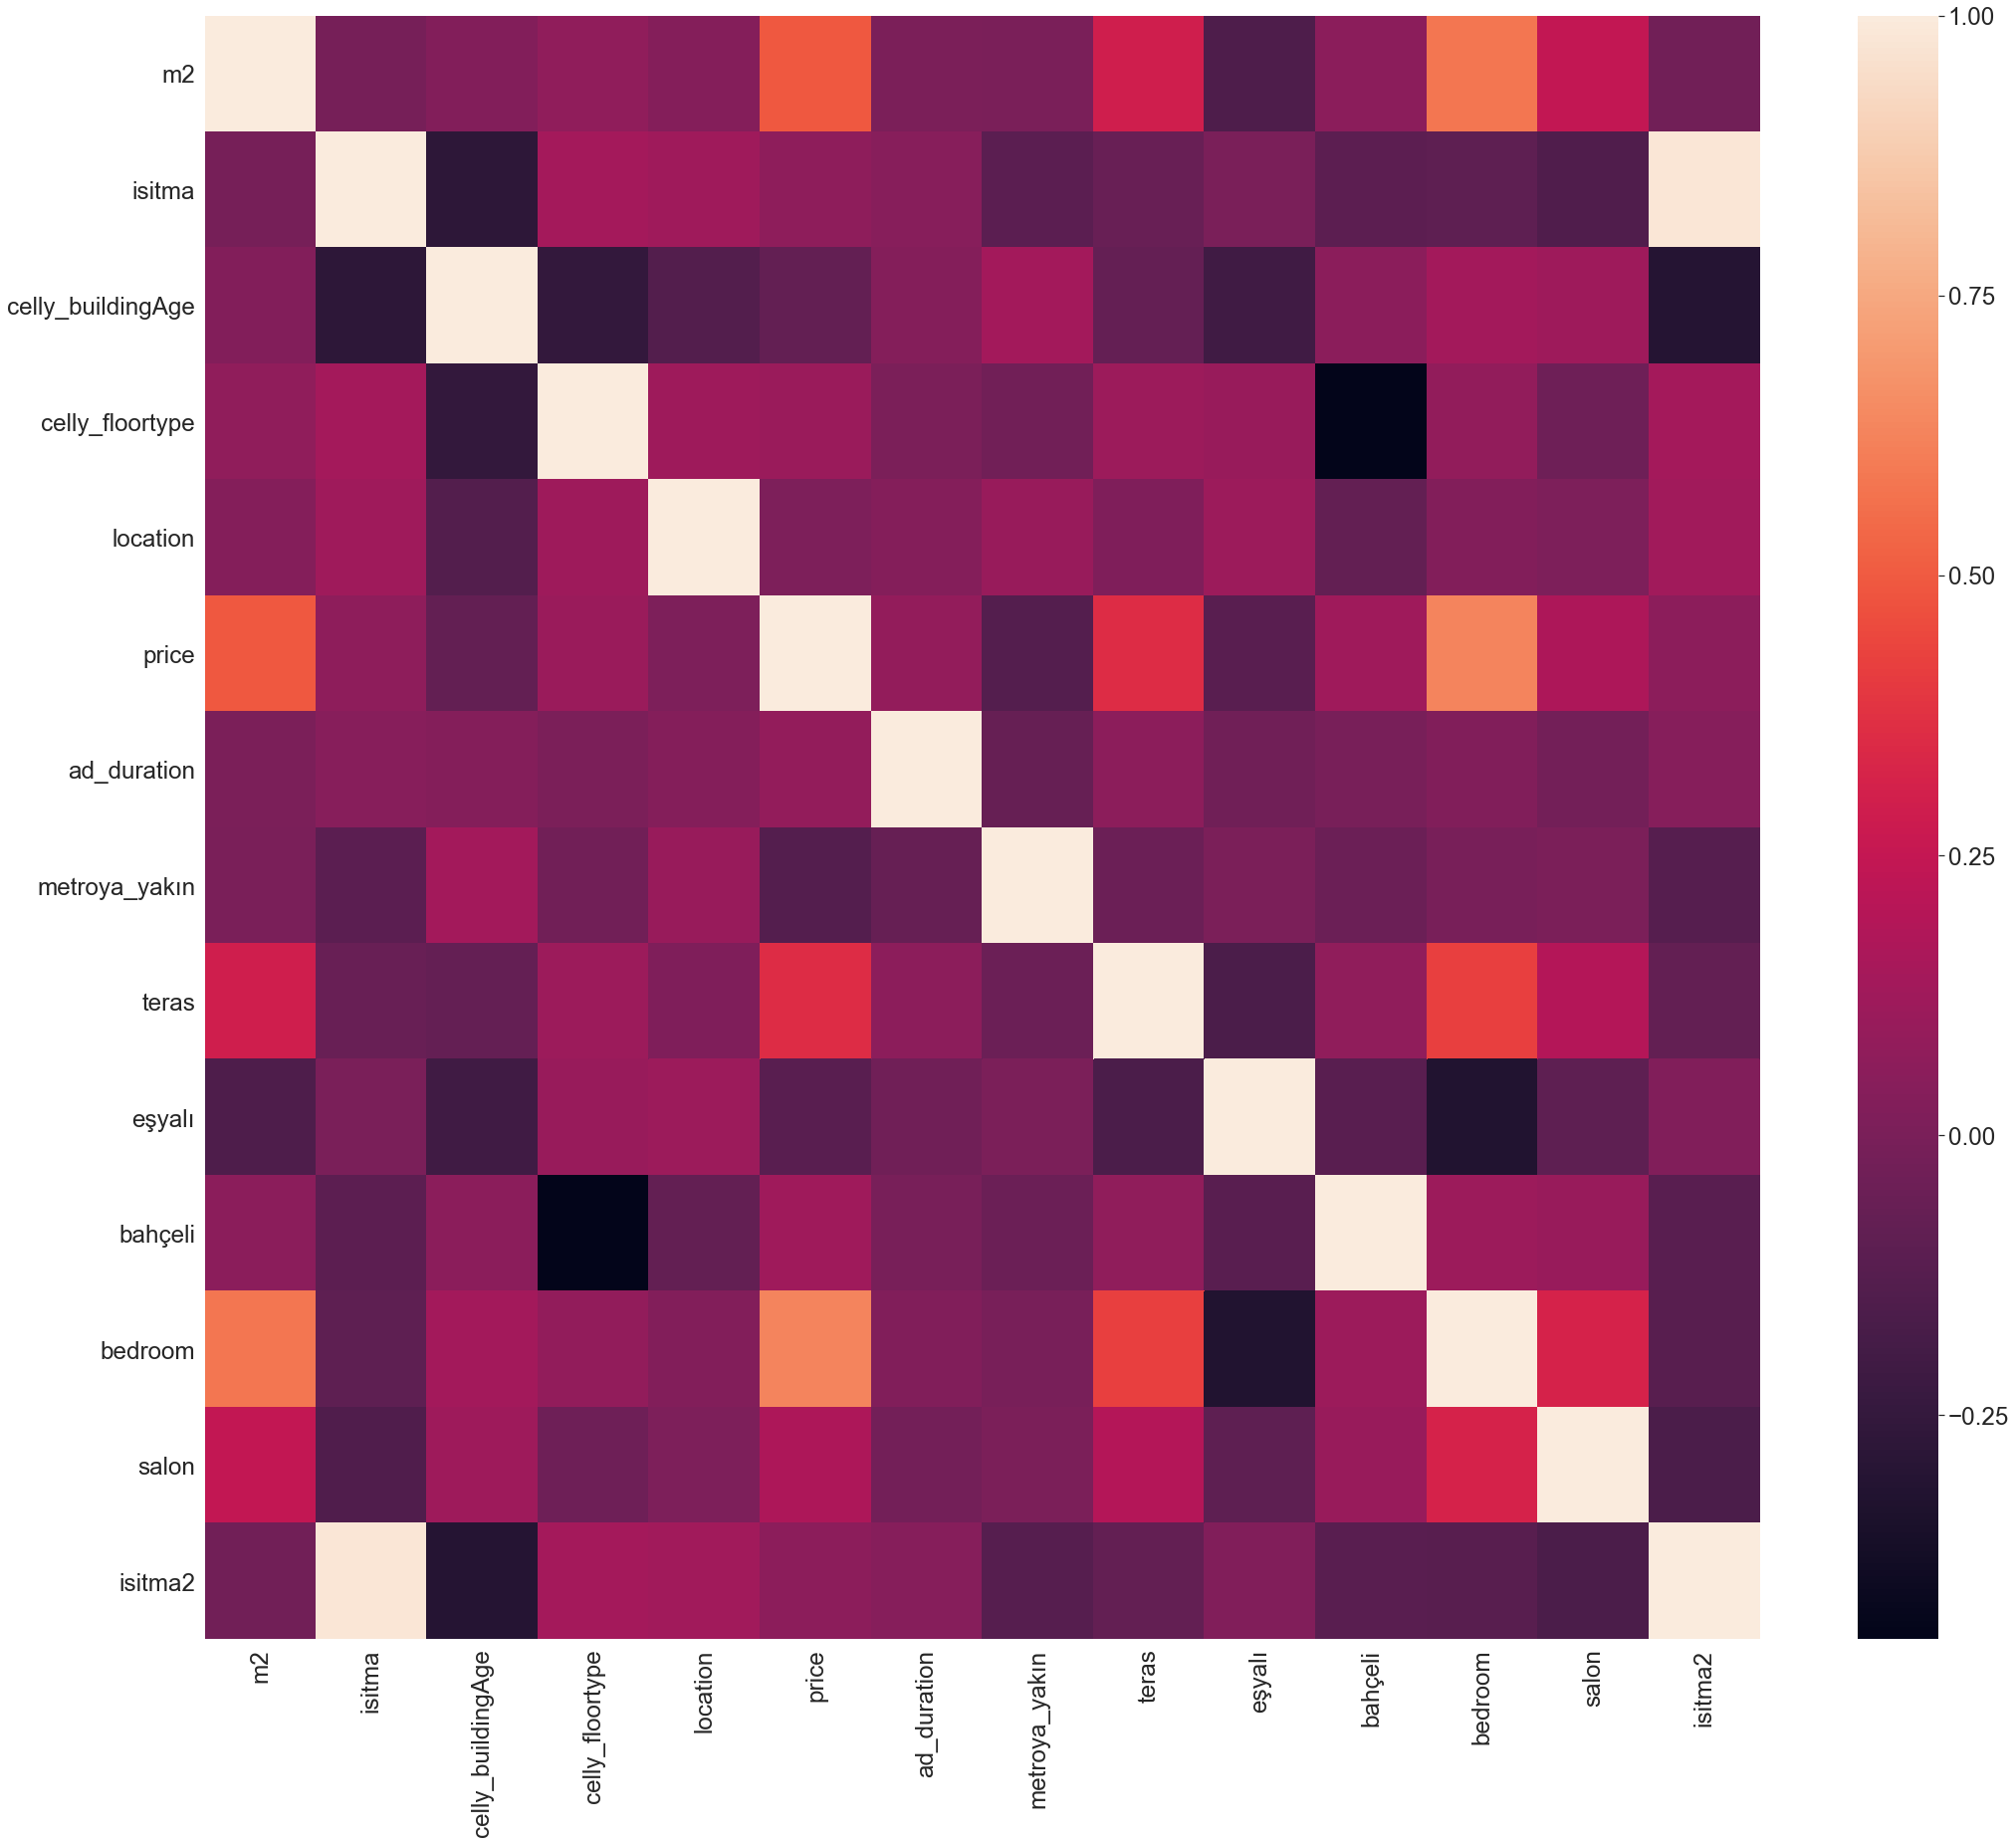

In [1149]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr())

This is last version of dataframe

In [1004]:
df.head()

,m2,isitma,celly_buildingAge,celly_floortype,location,price,ad_duration,metroya_yakın,teras,eşyalı,bahçeli,bedroom,salon
0,95.000000,0,25,0,3,4250,8,0,0,1,0,2,1
1,110.000000,0,20,1,1,2700,23,0,0,1,0,2,1
2,133.513993,0,20,2,8,5500,0,0,1,0,0,4,1
3,80.000000,0,20,1,0,2250,6,0,0,0,0,1,1
4,80.000000,0,14,1,1,1600,2,0,0,1,0,1,1


In [1080]:
df.columns

Index(['m2', 'isitma', 'celly_buildingAge', 'celly_floortype', 'location',
       'price', 'ad_duration', 'metroya_yakın', 'teras', 'eşyalı', 'bahçeli',
       'bedroom', 'salon', 'isitma2'],
      dtype='object')